# Рубежный контроль №2

## Калашников Артем Дмитриевич ИУ5-63Б

### Вариант 11

#### Задача:

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

#### Методы для ИУ5-63Б.
Метод №1: "Дерево решений".
Метод №2: "Случайный лес".

## Импорт библиотек:

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка и обработка пропусков в данных:

In [285]:
# загрузка набора данных
data = pd.read_csv('data.csv', sep=",")
# размер набора данных
data.shape

(18207, 89)

In [286]:
# первые 5 строк набора данных
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [287]:
parts = np.split(data, [28], axis=1)
data = parts[0]
parts = np.split(data, [500], axis=0)
data = parts[0]

In [288]:
# список колонок с типами данных
data.dtypes

Unnamed: 0                  object
ID                          object
Name                        object
Age                         object
Photo                       object
Nationality                 object
Flag                        object
Overall                     object
Potential                   object
Club                        object
Club Logo                   object
Value                       object
Wage                        object
Special                     object
Preferred Foot              object
International Reputation    object
Weak Foot                   object
Skill Moves                 object
Work Rate                   object
Body Type                   object
Real Face                   object
Position                    object
Jersey Number               object
Joined                      object
Loaned From                 object
Contract Valid Until        object
Height                      object
Weight                      object
dtype: object

In [289]:
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('Name', axis = 1)
data = data.drop('Photo', axis = 1)
data = data.drop('Flag', axis = 1)
data = data.drop('Club Logo', axis = 1)
data = data.drop('Loaned From', axis = 1)
data = data.drop('Work Rate', axis = 1)
data = data.drop('Nationality', axis = 1)
data = data.drop('Club', axis = 1)
data = data.drop('Body Type', axis = 1)
data = data.drop('Real Face', axis = 1)
data = data.drop('Position', axis = 1)
data = data.drop('Joined', axis = 1)
data = data.drop('Contract Valid Until', axis = 1)

In [290]:
data.dtypes

ID                          object
Age                         object
Overall                     object
Potential                   object
Value                       object
Wage                        object
Special                     object
Preferred Foot              object
International Reputation    object
Weak Foot                   object
Skill Moves                 object
Jersey Number               object
Height                      object
Weight                      object
dtype: object

In [291]:
dct = {'Left': 0, 'Right': 1}
data['Preferred_Foot']=data['Preferred Foot'].map(dct)
data
data = data.drop('Preferred Foot', axis = 1)

In [292]:
# Удаление строк, содержащих пустые значения
data_new = data.dropna(axis=0, how='any')
(data.shape, data_new.shape)

((500, 14), (500, 14))

In [293]:
# проверим, есть ли пропущенные значения
data_new.isnull().sum()

ID                          0
Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Special                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Jersey Number               0
Height                      0
Weight                      0
Preferred_Foot              0
dtype: int64

In [294]:
data=data_new
data.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Preferred_Foot
0,158023,31,94,94,€110.5M,€565K,2202,5.0,4.0,4.0,10.0,5'7,159lbs,0
1,20801,33,94,94,€77M,€405K,2228,5.0,4.0,5.0,7.0,6'2,183lbs,1
2,190871,26,92,93,€118.5M,€290K,2143,5.0,5.0,5.0,10.0,5'9,150lbs,1
3,193080,27,91,93,€72M,€260K,1471,4.0,3.0,1.0,1.0,6'4,168lbs,1
4,192985,27,91,92,€102M,€355K,2281,4.0,5.0,4.0,7.0,5'11,154lbs,1


In [295]:
data.shape

(500, 14)

## Масштабирование данных:

### MinMax масштабирование

In [296]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [297]:
# Числовые колонки для масштабирования
colums = ['ID','Age','Overall','Potential','Special','International Reputation','Weak Foot','Skill Moves','Jersey Number']
scale = colums

In [298]:
sc = MinMaxScaler()
scd = sc.fit_transform(data[scale])

In [299]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale)):
    col = scale[i]
    new_name = col + '_scaled'
    data[new_name] = scd[:,i]

In [300]:
data.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,Preferred_Foot,ID_scaled,Age_scaled,Overall_scaled,Potential_scaled,Special_scaled,International Reputation_scaled,Weak Foot_scaled,Skill Moves_scaled,Jersey Number_scaled
0,158023,31,94,94,€110.5M,€565K,2202,5.0,4.0,4.0,...,0,0.660554,0.590909,1.000000,0.933333,0.888025,1.00,0.75,0.75,0.098901
1,20801,33,94,94,€77M,€405K,2228,5.0,4.0,5.0,...,1,0.086802,0.681818,1.000000,0.933333,0.908243,1.00,0.75,1.00,0.065934
2,190871,26,92,93,€118.5M,€290K,2143,5.0,5.0,5.0,...,1,0.797898,0.363636,0.857143,0.866667,0.842146,1.00,1.00,1.00,0.098901
3,193080,27,91,93,€72M,€260K,1471,4.0,3.0,1.0,...,1,0.807134,0.409091,0.785714,0.866667,0.319596,0.75,0.50,0.00,0.000000
4,192985,27,91,92,€102M,€355K,2281,4.0,5.0,4.0,...,1,0.806737,0.409091,0.785714,0.800000,0.949456,0.75,1.00,0.75,0.065934


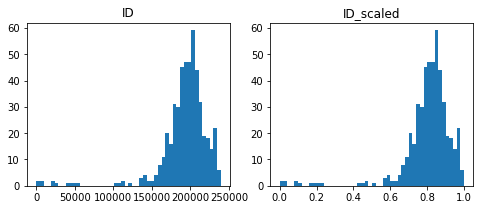

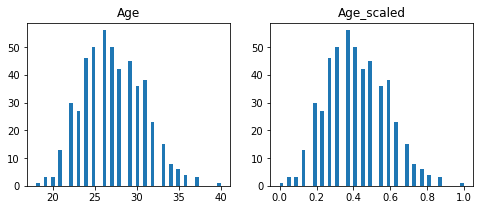

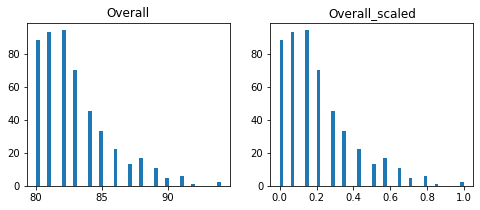

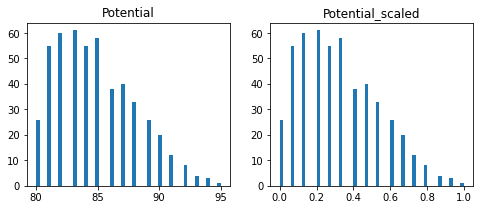

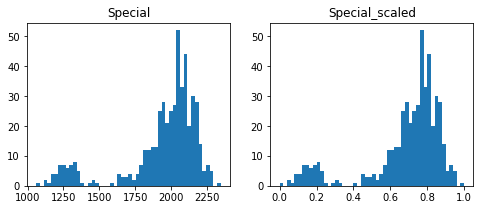

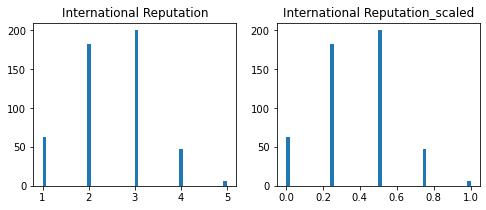

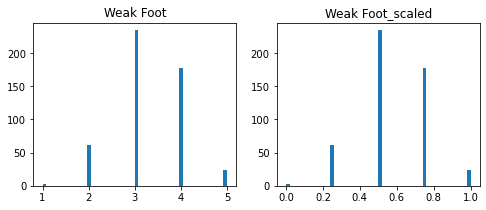

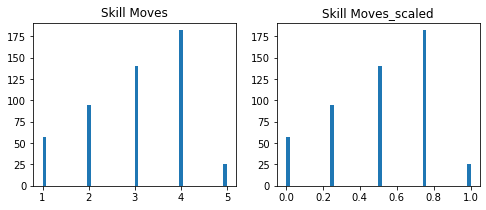

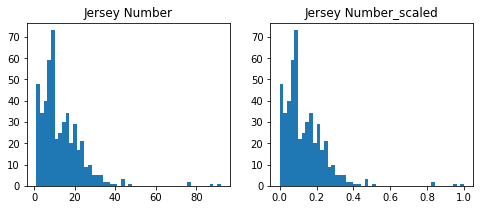

In [301]:
for col in scale:
    colsc = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[colsc], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(colsc)
    plt.show()

In [302]:
data.drop(colums, axis = 1, inplace = True)

In [303]:
data = data.drop('Height', axis = 1)
data['Value'] = data.Value.str.replace('€','')
data['Wage'] = data.Wage.str.replace('€','')
data['Value'] = data.Value.str.replace('M','')
data['Wage'] = data.Wage.str.replace('K','')
data['Weight'] = data.Weight.str.replace('lbs','')

In [304]:
data.head()

,Value,Wage,Weight,Preferred_Foot,ID_scaled,Age_scaled,Overall_scaled,Potential_scaled,Special_scaled,International Reputation_scaled,Weak Foot_scaled,Skill Moves_scaled,Jersey Number_scaled
0,110.5,565,159,0,0.660554,0.590909,1.000000,0.933333,0.888025,1.00,0.75,0.75,0.098901
1,77,405,183,1,0.086802,0.681818,1.000000,0.933333,0.908243,1.00,0.75,1.00,0.065934
2,118.5,290,150,1,0.797898,0.363636,0.857143,0.866667,0.842146,1.00,1.00,1.00,0.098901
3,72,260,168,1,0.807134,0.409091,0.785714,0.866667,0.319596,0.75,0.50,0.00,0.000000
4,102,355,154,1,0.806737,0.409091,0.785714,0.800000,0.949456,0.75,1.00,0.75,0.065934


## Построение моделей

In [305]:
X = data.drop(['ID_scaled'], axis = 1)
Y = data.ID_scaled
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Value Wage Weight  Preferred_Foot  Age_scaled  Overall_scaled  \
0  110.5  565    159               0    0.590909        1.000000   
1     77  405    183               1    0.681818        1.000000   
2  118.5  290    150               1    0.363636        0.857143   
3     72  260    168               1    0.409091        0.785714   
4    102  355    154               1    0.409091        0.785714   

   Potential_scaled  Special_scaled  International Reputation_scaled  \
0          0.933333        0.888025                             1.00   
1          0.933333        0.908243                             1.00   
2          0.866667        0.842146                             1.00   
3          0.866667        0.319596                             0.75   
4          0.800000        0.949456                             0.75   

   Weak Foot_scaled  Skill Moves_scaled  Jersey Number_scaled  
0              0.75                0.75              0.098901  
1           

In [306]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.30)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

     Value Wage Weight  Preferred_Foot  Age_scaled  Overall_scaled  \
141    24   42    192               1    0.500000        0.285714   
383    16   59    183               1    0.454545        0.071429   
135  24.5  165    154               1    0.454545        0.285714   
493  11.5   63    196               1    0.500000        0.000000   
122    39   72    154               0    0.318182        0.285714   

     Potential_scaled  Special_scaled  International Reputation_scaled  \
141          0.333333        0.212286                             0.25   
383          0.133333        0.595645                             0.50   
135          0.266667        0.867030                             0.50   
493          0.000000        0.632193                             0.25   
122          0.466667        0.801711                             0.25   

     Weak Foot_scaled  Skill Moves_scaled  Jersey Number_scaled  
141              0.50              

## "Дерево решений"

In [307]:
from sklearn.tree import DecisionTreeRegressor

In [308]:
dtc = DecisionTreeRegressor(random_state=1).fit(X_train, Y_train)
data_test_predicted_dtc = dtc.predict(X_test)

## "Случайный лес"

In [309]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [310]:
rf = RandomForestRegressor(random_state=1).fit(X_train, Y_train)
data_test_predicted_rf = rf.predict(X_test)

## Оценка качества моделей

In [311]:
print('Метрика MSE:\nДерево решений: {}\nСлучайный лес: {}'.format(mean_squared_error(Y_test, data_test_predicted_dtc), mean_squared_error(Y_test, data_test_predicted_rf)))

Метрика MSE:
Дерево решений: 0.017932644991507766
Случайный лес: 0.012360212855212596


In [312]:
print('Метрика R\u00B2:\nДерево решений: {}\nСлучайный лес: {}'.format(r2_score(Y_test, data_test_predicted_dtc), r2_score(Y_test, data_test_predicted_rf)))

Метрика R²:
Дерево решений: 0.46296851245460957
Случайный лес: 0.6298469356218279


## Вывод
Исходя из оценки качества построенных моделей можно увидеть, что модели "Случайный лес" и "Дерево решений" одинаково справились с поставленной задачей